### Linear Regression 

## 1 Linear Regression Model

**Note**: The following model description is from Andrew Ng's machine learning class. This notation is commonly used in machine learning, and we are adopting it here to introduce the topic. As we transition to neural networks, some of the notation will change (for example, the parameters $\theta$ will be referred to as weights $w$); however, the discussion below and the use of subscripts and superscripts is helpful for communicating the concepts and dimensionality of the data.

Linear regression represents an important class of supervised learning problems in which one or more features are used to predict a scalar. More formally, the goal is to learn a function that maps input features to an output scalar value. The function is sometimes referred to as a **hypothesis** and for linear regression takes the general form below.

$$ h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ...$$

We often simplify the notation as follows:

$$ y' = \theta_0 + \theta_1x_1 + \theta_2x_2 + ...$$

Here, the $\theta_i$'s are the parameters (also called weights) parameterizing the space of linear functions mapping from $x$ to $y$. The problem is called **regression** when the target value is a continuous variable. When the target value represents a small number of discrete values (e.g., classes), we call it a **classification** problem. We postulate a hypothesis space in both cases and use input training data (features) to learn the parameters that fit the data. In this notebook, we will restrict our attention to regression problems.

In the case of a single input feature, we have the familiar form for the equation of a line where $y'$ represents the estimated value of $y$ given an input value of $x$ and the parameters $m$ abd $b$. Here, $b$ represents $\theta_0$ and $m$ represents $\theta_1$.

$$y' = mx + b$$

To simplify the general notation, we can introduce the convention of letting $x_0 = 1$ (this is the intercept term), so that:

$$ h(x) = \sum_{i=0}^{n} \theta_ix_i = \theta^Tx $$

where, on the right-hand side above, we are viewing $\theta$ and $x$ both as vectors, and here $n$ is the number of input variables (not counting $x_0$). This has no consequence on the results, but makes the mathematical notation more compact for the discussion that follows.

Now, given a training set, how do we pick, or learn, the parameters $\theta$s A reasonable approach is to make $h(x)$ close to $y$, at least for the training examples we have. To formalize this, we will define a function
that measures, for each value of the $\theta$s, how close the $h(x(i))$’s are to the corresponding $y(i)$’s. We define the loss function:

$$ J(\theta) = \frac{1}{2}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

We have previously shown that the above loss function can be minimized using **gradient descent**. The next section below shows that linear regression can also be solved using a closed-form analytic solution referred to as the **normal equations**.


## 2 Ordinary Least Squares and the Normal Equations (Closed Form Solution)

In this section, we will develop an analytical solution to linear regression and will take the opportunity to also introduce linear algebra matrix notation to keep the equations more compact.

Given a training set, we define a **design matrix** $X$ that can be represented as an $m$ x $n$ matrix that contains $m$ training examples in its rows and, $n$ represents the number of features in each training example. Often times the bias (or intercept) term is added to each row in the matrix in which case the matrix, becomes an $m$ x $(n+1)$. <br><br>

$$
X = \begin{bmatrix}
\hspace{2mm}( x^{(1)})^T \hspace{2mm}\\
\hspace{2mm}( x^{(2)})^T \hspace{2mm}\\
       \vdots\\
\hspace{2mm}( x^{(m)})^T \hspace{2mm}\\
\end{bmatrix}
$$


Let $\vec{y}$ be the $m$-dimensional vector that contains all the target values from the training set.<br><br>

\begin{equation}
\vec{y} = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}
\end{equation}

Now, since $h(x^{(i)}) = (x^{(i)})^T θ$, we can easily verify that:<br><br>

\begin{equation}
X\theta - \vec{y} = \begin{bmatrix}
( x^{(1)})^T\theta \\
( x^{(2)})^T\theta \\
\vdots \\
( x^{(m)})^T\theta \\
\end{bmatrix}-
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}
\end{equation}

<br>

\begin{equation}
= \begin{bmatrix}
h_\theta(x^{(i)}) - y^{(i)} \\
\vdots\\
h_\theta(x^{(m)}) - y^{(m)} \\
\end{bmatrix}
\end{equation}

<br><br>
Using the fact that for a vector $z$, we have that $z^Tz = \sum_i z_i^2$:<br><br>

\begin{equation}
\frac{1}{2}(X\theta - \vec{y})^T(X\theta - \vec{y}) = \frac{1}{2}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation}

To minimize $J$, we compute the gradient of $J$ with respect to $\theta$ as follows:<br><br>

  $$ \nabla_\theta J(\theta) = \nabla_\theta \frac{1}{2} (X\theta - \vec{y})^T(X\theta - \vec{y}) $$
  
Carrying out the above gradient requires some matrix calculus and some matrix properties, which we will not delve into, but is easily found on the internet. The above gradient simplifies to the following expression:<br>

 $$ = X^TX\theta - X^T \vec{y} $$

To minimize $J$, we set its derivative to zero, and obtain the **normal equations**:<br><br>

 $$ X^TX\theta = X^T \vec{y} $$

Thus, the value of $\theta$ that minimizes $J(\theta)$ is given in closed-form by the following equation:<br><br>

$$ \theta = (X^TX)^{-1}X^T\vec{y} $$

<br><br>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch  
from torch import nn 
import torch.optim as optim 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
block_plot=False

## 3 Fitting a Straight Line using the Normal Equations

We will begin by showing that the normal equations can be used to find the parameters of a straight line (slope and intercept) given a set of data points in two dimensions.

In [2]:
import random 
torch.manual_seed(42)
torch.backends.deterministic = True
torch.backends.benchmark = True
#torch.backends.deterministic = True is used to make sure that the results are reproducible.

In [3]:
def create_linear_data(num_data=100,y_offset=0,slope=1,stddev=0.3):
    X = 10 * torch.rand(size=[num_data])
    y = y_offset +slope*X +torch.normal(std=stddev,mean=0,size=[num_data])
    X = X.view(len(X),1)
    y = y.view(len(y),1)     
    return X,y

In [4]:
def plot_data(x,y,xlim=(0,10),ylim=(0,10)):
    plt.figure()
    plt.plot(x,y,"b.")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show(block=block_plot)

### Generate Linear Data ###

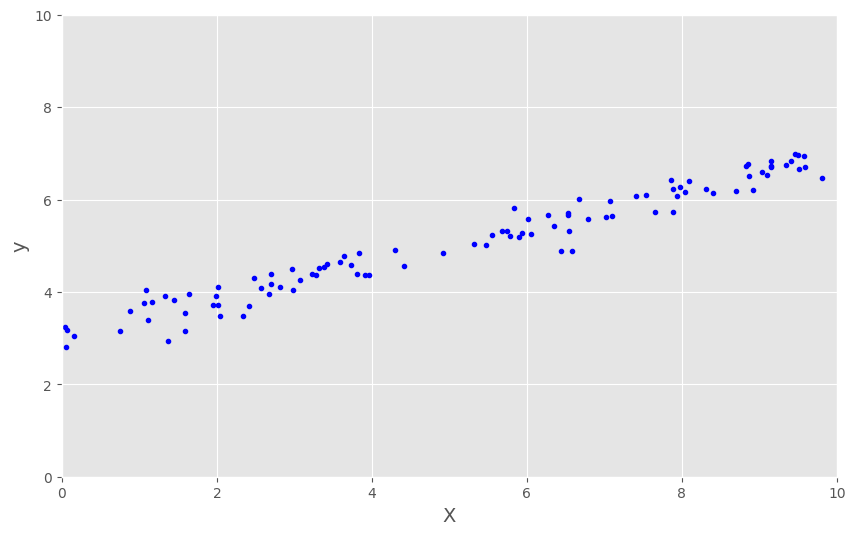

In [5]:
y_int = 3
slope = .4
X, y  = create_linear_data(y_offset = y_int, slope = slope, stddev = 0.3)

plot_data(X, y)

### Implement Normal Equations

In [6]:
def compute_theta(X,y):
    
    m = X.shape[0]
    X = torch.cat((torch.ones(m,1),X),axis=1) #why concat? this is to add the intercept term (bias)
    y= y.view((m,1)) #why reshape? to make sure y is a column vector
    X_T = X.T 
    XT_X = X_T @ X 
    XT_X_inv = torch.inverse(XT_X)
    XT_y = X_T @ y 
    theta = XT_X_inv @ XT_y
    return theta

### Solve for the Model Parameters (slope and y-intercept)

In [7]:
theta = compute_theta(X,y)
theta
y_int = theta[0].item()
slope = theta[1].item()
print(f"y intercept: {y_int:.3f}, slope: {slope:.3f}")

y intercept: 3.069, slope: 0.386


### Display the Results

In [8]:
def predict_y(X,theta):
    X = torch.cat((torch.ones(X.shape[0],1),X),axis=1)
    pred_y = X @ theta
    return pred_y

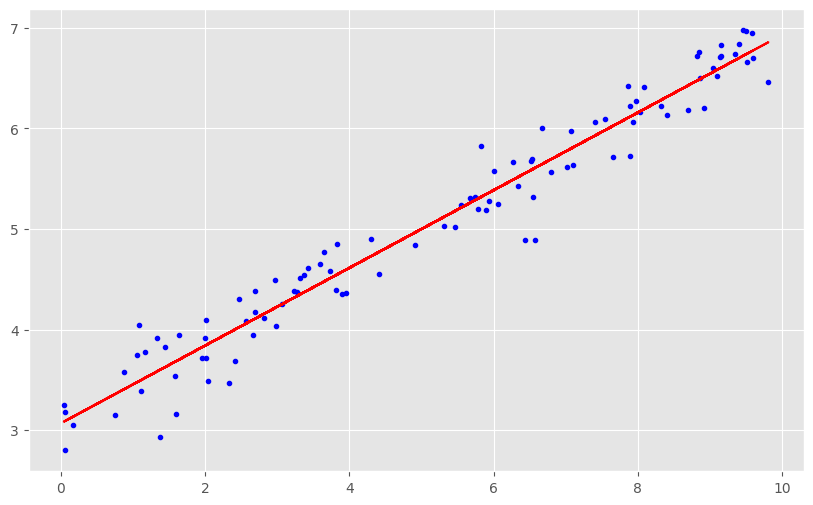

In [9]:
y_pred = predict_y(X,theta)
plt.plot(X,y,"b.")
plt.plot(X,y_pred,"r-")

### <font color="CornFlowerBlue">Discussion</font>

As you can see, using the normal equations to solve linear regression problems is very simple. However, there are several reasons why this approach can be problematic. Solving this equation requires inverting a matrix which can be computationally expensive, especially for very large problems which may include thousands of features. There is also an issue associated with its stability. Suppose that the matrix is not invertible due to numerical issues? There are methods that can mitigate some numerical problems, such as using what's known as the "pseudo" inverse, but this is not always ideal in practice, and these are some reasons why this approach is often not practical for large problems that we typically encounter in machine learning.

## 4 Fitting a Straight Line using PyTorch

Let's now take a look at solving this problem using a very simple linear neural network.

### 4.1 Mathematical Model
Create a simple linear model with one parameter (the slope) to model a straight line that passes through the origin.

The goal is to predict $y$ given some value of $x$. To do this, we will fit a line that goes through the data points $(x_i, y_i)$. We will simplify the problem so that the line passes through the origin. The equation for such a line is:

$$
y = mx
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. Therefore,

$$
y_i = m x_i
$$

The model has a single parameter $m$ (the slope of the line) that we wish to compute.

### 4.2 Modeling a Linear Neural Network in PyTorch
We restrict the model to a straight line that passes through the origin. Notice that this is very similar to the gradient descent notebook from the previous module, but rather than implementing all the details from scratch, we will use **PyTorch** to perform the same task. The network diagram below represents the simplest possible neural network. It has an input layer consisting of a single feature. Technically the input layer is not counted as a layer since there are no trainable parameters associated with it. The network has just a single layer consisting of a single neuron. The single-layer IS the output layer. The neuron has a linear activation function that simply multiplies the input feature $x$ by the weight $w$. For every training sample, the predicted output $y'$ is compared to the actual value from the training data, and the loss is computed. This allows us to compute the gradient with respect to $w$ and update the weight (slope) according to an input learning rate. All of these details are taken care of by PyTorch once we define the network model and call a function to train the network.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_01_linear_regression_wx.png' width=600 align='center'><br/>

The following steps summarize the workflow in PyTorch:

1. Build/Define a network model using PyTorch.
2. Define the optimizer `optimizer = optim.Adam(model.parameters())`
3. Define the loss to be used `criterion = torch.nn.MSELoss()`
4. Train the model with
    1. `optimizer.zero_grad()`
    2. `output = model(Train Data)`
    3. `loss = criterion(output, Train Label)`
    4. `loss.backward()`
    5. `optimizer.step()`
4. Predict the output `model(Test Data)`


<img src='https://opencv.org/wp-content/uploads/2023/05/c3-week2-linear-regression-auto-mpg.png' width=600 align='center'><br/>


### Create the PyTorch Model

The bias term for the neuron will be set to zero in this example using the option `bias=False`.

In [10]:
model = nn.Linear(in_features=1,out_features=1,bias=False)

### Compile the Model

Compiling the model requires you to specify the type of loss function (in this case, mean square error: 'mse') and to also specify the specific type of optimizer to use.

In [11]:
optimizer = optim.Adam(model.parameters(),lr=0.1)
criterion = nn.MSELoss()

### Train the Model

Once the loss and optimizer are defined start training each epoch in a loop. At the begining of each loop use optimizer.zero_grad to reset gradients from previous epoch. Calculate model's predictions, compute the loss between predicted labels and ground truth. Compute the gradients with for each parameter `loss.backward` update the parameters using the gradients `optimizer.step`.

In [12]:
loss_curve = []
for epoch in range(5000):
    optimizer.zero_grad()
    output = model(X.float())
    loss = criterion(output, y.float())
    loss.backward()
    optimizer.step()
    loss_curve.append(loss.detach().numpy().item())
    # print(f"Epoch {epoch+1} | Loss {loss.item()}")

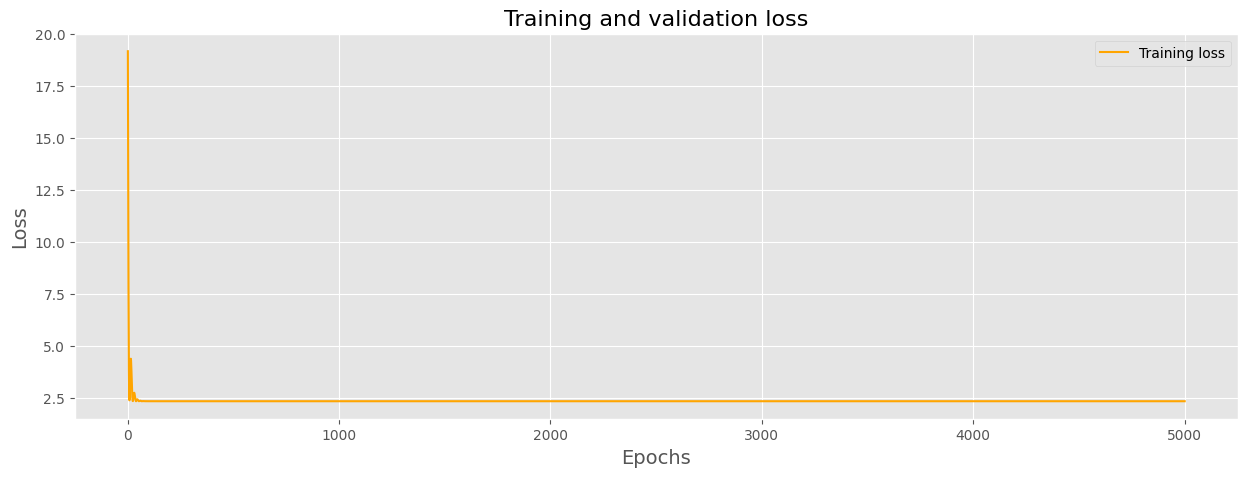

In [13]:
loss_values = loss_curve
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Predict Model Parameters and Display Results

After the model has been trained, we can access the trained parameters directly from the model object.

Slope:  0.8359525


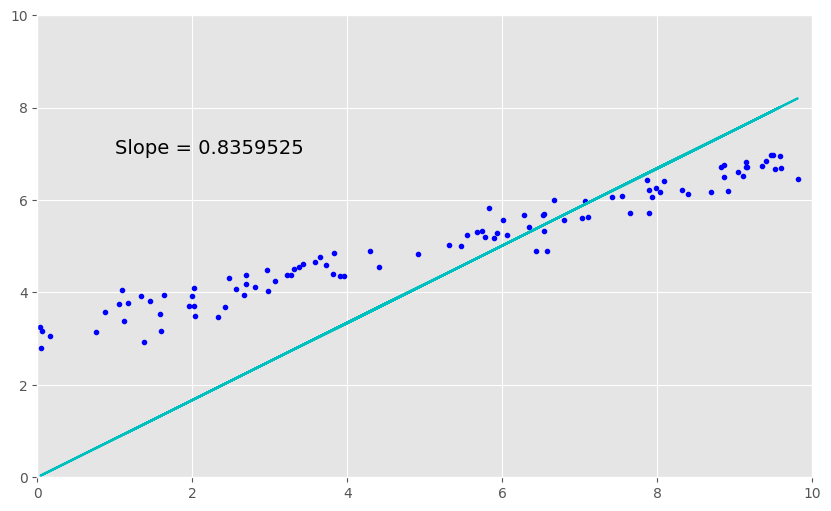

In [14]:
slope = model.state_dict()["weight"][0]
print('Slope: ', slope[0].numpy())

pred_y = model(X.float()).detach().numpy()

plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize = 14)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### <font color="CornFlowerBlue">Discussion</font>

The fitted line must pass through the origin since our model for the line only includes the slope, so it cannot fit the data very well, as shown in the plot above. Next, let's add the bias term to the network model and see how much better the fitted model performs. This is easily done in PyTorch by passing an input flag `bias=True` when we define the model.

### Create the PyTorch Model with a Bias Term

In this section, we will model the bias term as shown in the network diagram below.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_01_linear_regression_wx_b.png' width=600 align='center'><br/>

In [17]:
model = nn.Linear(in_features=1,out_features=1,bias=True)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()


### Train the Model

In [18]:
loss_curve = []
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    output = model(X)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_curve.append(loss.detach().item())

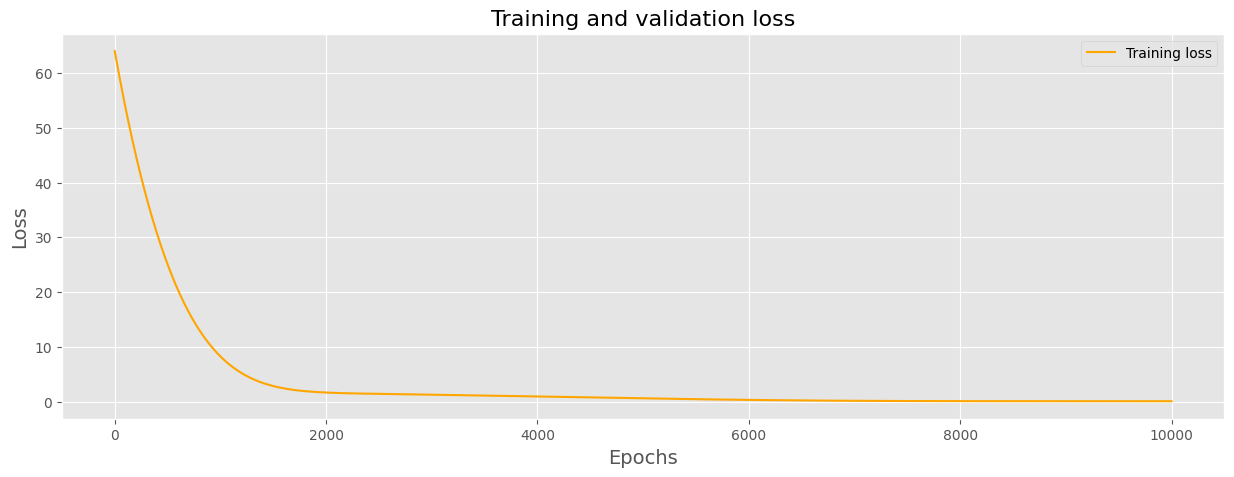

In [19]:
loss_values = loss_curve
epochs = range(1,len(loss_values)+1)
plt.figure(figsize = [15, 5])
plt.plot(epochs, loss_values, "orange", label = "Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [20]:
slope = model.state_dict()['weight'][0]
y_int = model.state_dict()['bias'][0]
pred_y = model(X).detach()

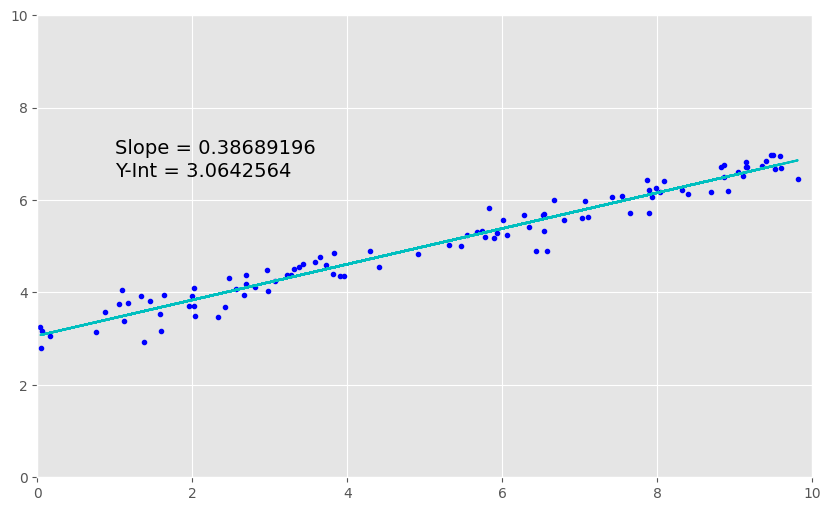

In [21]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize = 14)
plt.text(1, 6.5, 'Y-Int = ' + str(y_int.numpy()),    fontsize = 14)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## Fitting Non-Linear Data using PyTorch

In this section, we will use a single neuron to fit a non-linear mathematical function of the form below:

$$ y = \theta_0 + \theta_1xcos(x) + \theta_2x^2 + noise$$

Notice this is a non-linear function but it is *linear* in the parameters ($\theta_0, \theta_1, \theta_2$). In other words, the independent variables can be non-linear, as in the example above. The terms $xcos(x)$ and $x^2$ are the input features we will use to train the model.

An example of a functional form that is **not** linear in the parameters is given below since it cannot be expressed as the weighted sum of input features.

$$ y = \theta_0 + X^{\theta_1}cos(X + \theta_2)$$

### 5.1 Create Convenience Function